<a href="https://colab.research.google.com/github/ayu1521/Prediction-of-air-quality/blob/main/MSE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving air_quality.csv to air_quality (4).csv

📊 Data Head:
         pm25         no2  temperature quality_level
0  157.744434    5.376279    31.109108          high
1  101.270316  130.903661    19.298140           low
2  197.204350   17.254966    37.652832          high
3   81.580404   91.605322    39.682532           low
4  152.419877  148.007264    12.175063           low

📌 Class Distribution:
quality_level
low       35
high      34
medium    31
Name: count, dtype: int64


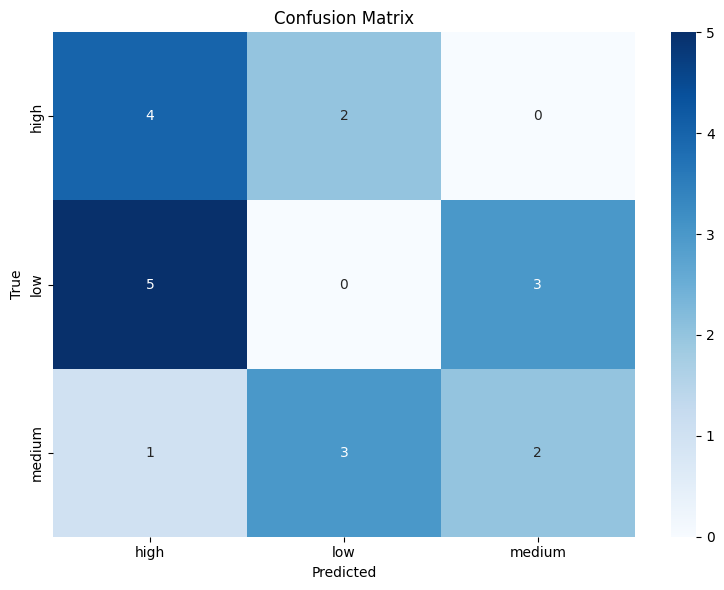


✅ Accuracy: 0.30
✅ Precision: 0.24
✅ Recall: 0.30
✅ F1-Score: 0.26

📌 Feature Importances:
pm25: 0.34
no2: 0.34
temperature: 0.32

📌 Input Ranges:
pm25: min=12.597673317129484, max=197.20434962644583
no2: min=5.376278535628751, max=149.60205254141718
temperature: min=5.427107531131558, max=39.91924155733452

Enter PM2.5 value: 70
Enter NO2 value: 25
Enter Temperature value: 30

🧾 Predicted Air Quality Level: high


In [8]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from google.colab import files

# 📁 Upload the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# 👀 Preview data
print("\n📊 Data Head:")
print(data.head())

# 🧮 Check class distribution
print("\n📌 Class Distribution:")
print(data['quality_level'].value_counts())

# ✅ Feature & target selection
X = data[['pm25', 'no2', 'temperature']]
y = data['quality_level']

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Random Forest with class weight
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 🔍 Evaluate predictions
y_pred = model.predict(X_test)

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 📈 Metrics
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"✅ Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
print(f"✅ Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.2f}")

# 🔎 Feature Importance
print("\n📌 Feature Importances:")
for feat, score in zip(X.columns, model.feature_importances_):
    print(f"{feat}: {score:.2f}")

# 🧭 Show input ranges
print("\n📌 Input Ranges:")
for col in X.columns:
    print(f"{col}: min={X[col].min()}, max={X[col].max()}")

# 🔮 Predict from user input
try:
    pm25_input = float(input("\nEnter PM2.5 value: "))
    no2_input = float(input("Enter NO2 value: "))
    temp_input = float(input("Enter Temperature value: "))

    for val, name in zip([pm25_input, no2_input, temp_input], ['pm25', 'no2', 'temperature']):
        if val < X[name].min() or val > X[name].max():
            print(f"⚠️ {name} is out of range: [{X[name].min()}, {X[name].max()}]")

    input_data = pd.DataFrame([[pm25_input, no2_input, temp_input]], columns=X.columns)
    prediction = model.predict(input_data)[0]
    print(f"\n🧾 Predicted Air Quality Level: {prediction}")
except ValueError:
    print("❌ Please enter valid numeric values.")
